In [1]:
from func_search import *
from func_def_class import *
from func_taux_transm import *
from func_res import *


import os
from path import Path
import csv
#import matplotlib.pyplot as plt 
import ConfigParser
from struct import unpack
import re

In [2]:
import matplotlib.pyplot as plt
from pandas import *
import pandas as pd
import ast
from sklearn.tree import *
from sklearn import tree
import pydotplus 
from IPython.display import Image 

In [15]:
line = """
2017-03-30 16:07:22,035 [ParserPrintf:INFO] (asn=5115) from b376:SIXTOP:LinkReq rcvd - 
LinkRep prepared: from a772, bw=1, track=3, owner=a772, via track=0, owner=0000, queuePos=1, 
slot 35, ch 15, code 6
"""

asn = line[line.find("asn")+len("asn="):line.find(")", line.find("asn"))]
src = line[line.find("from")+len("from "):line.find(":", line.find("from"))]
dest = line[line.find("to ")+len("to "):line.find(",", line.find("to "))]
src2 = line[line.find("from",line.find("from")+1)+len("from "):line.find(",", line.find("from",line.find("from")+1))]


print src

b376


In [3]:
df_res = pd.read_csv(r'data_csv/res.csv', dtype=str)
df_res

,asn,succes,numAttempts,simult_req,simult_rep,queuePos,slot,ch,src,dest,owner,state,info
0,"[1221, 1339, 1562]",1,1,"[3, 1]",[1],"[0, 2, 2]",141,9,8772,b868,b868,4,NaN
1,"[1221, 1299, 1583]",1,1,"[3, 1]",[1],"[0, 1, 1]",93,11,b381,b868,b868,4,NaN
2,"[1221, 2407]",0,1,"[1, 2, 3, 1]",NaN,"[0, 0]",-1,-1,1162,b868,b868,-1,NaN
3,"[1627, 1664, 1705]",1,1,[1],[1],"[0, 1, 1]",21,7,c280,8772,b868,4,NaN
4,"[1830, 1867, 2233]",1,1,[3],[3],"[0, 1, 1]",45,4,c280,8772,b868,4,NaN
5,"[2236, 2577, 2780]",1,1,[1],[1],"[1, 1, 1]",181,12,8772,b868,8772,4,NaN
6,"[2439, 4116]",0,2,"[1, 1, 1]",NaN,"[0, 0]",-1,-1,1162,b868,b868,-1,NaN
7,"[2845, 5002]",0,1,"[1, 1]",NaN,"[1, 1]",-1,-1,8772,b868,8772,-1,NaN
8,"[3048, 3138, 3341]",1,1,[1],[1],"[1, 1, 1]",13,7,b381,b868,b381,4,NaN
9,"[3251, 3938, 4141]",1,1,"[1, 1, 1, 1]",[1],"[0, 2, 2]",101,14,c280,b868,b868,4,NaN


In [4]:
df_tx = pd.read_csv(r'data_csv/pkt_tx.csv', dtype=str)
df_tx["asn"] = df_tx["asn"].astype(int)
df_tx["numTxAttempts"] = df_tx["numTxAttempts"].astype(int)
df_tx

,time,addr,comp,asn,statType,trackinstance,trackowner,length,frameType,slotOffset,frequency,l2Dest,txpower,numTxAttempts,queuePos,succes_rx,succes_ack,list_rx
0,"2017-04-07 09:30:58,882",b868,22,730,3,0,0000000000000000,47,IEEE154_TYPE_DATA,121,16,ffffffffffffffff,31,1,0,0,0,[]
1,"2017-04-07 09:31:07,538",b868,12,1015,3,0,0000000000000000,67,IEEE154_TYPE_BEACON,0,16,ffffffffffffffff,31,1,0,1,0,"['8772', 'b381', '1162', 'c280']"
2,"2017-04-07 09:31:09,884",b868,22,1096,3,0,0000000000000000,47,IEEE154_TYPE_DATA,81,16,ffffffffffffffff,31,1,0,1,0,"['b381', '1162', '8772']"
3,"2017-04-07 09:31:14,754",8772,15,1258,3,0,0000000000000000,61,IEEE154_TYPE_DATA,40,16,054332ff03dab868,31,1,0,0,0,[]
4,"2017-04-07 09:31:14,754",b381,15,1258,3,0,0000000000000000,61,IEEE154_TYPE_DATA,40,16,054332ff03dab868,31,1,0,0,0,[]
5,"2017-04-07 09:31:14,755",1162,12,1258,3,0,0000000000000000,67,IEEE154_TYPE_BEACON,40,16,ffff000000000000,31,1,1,0,0,[]
6,"2017-04-07 09:31:15,477",1162,15,1282,3,0,0000000000000000,61,IEEE154_TYPE_DATA,81,16,054332ff03dab868,31,1,0,0,0,[]
7,"2017-04-07 09:31:15,990",b381,15,1299,3,0,0000000000000000,61,IEEE154_TYPE_DATA,81,16,054332ff03dab868,31,2,0,1,1,['b868']
8,"2017-04-07 09:31:17,191",8772,15,1339,3,0,0000000000000000,61,IEEE154_TYPE_DATA,121,16,054332ff03dab868,31,2,0,1,1,['b868']
9,"2017-04-07 09:31:18,453",b381,22,1380,3,0,0000000000000000,47,IEEE154_TYPE_DATA,162,16,ffffffffffffffff,31,1,0,1,0,['1162']


In [5]:
df_r = pd.read_csv(r'data_csv/res_step.csv', dtype=str)
df_r = df_r.fillna('')
df_r


,asn,src,dest,owner,ch,slot,queuePos,info
0,1221,8772,b868,b868,,,0,linkreq enqueued
1,1221,b381,b868,b868,,,0,linkreq enqueued
2,1221,1162,b868,b868,,,0,linkreq enqueued
3,1299,b381,b868,,,,0,linkreq txed
4,1299,b381,b868,,11,93,1,LinkReq rcvd - LinkRep prepared
5,1339,8772,b868,,,,0,linkreq txed
6,1339,8772,b868,,9,141,2,LinkReq rcvd - LinkRep prepared
7,1562,8772,b868,,,b868,2,LinkRep txed
8,1562,8772,b868,,,,,LinkRep rcvd - Res successful
9,1583,b381,b868,,,b868,1,LinkRep txed


In [14]:
# pour transformer un str en liste
#ast.literal_eval(df_res.loc[i]["asn"])

In [4]:
# fonction pour compter le nobre de colision / pkt perdu

#la somme des 4 count = le nb de paquets total envoyé
# les succes ne prennent que la derniere tentative d'une réussite (ce sont les pkt qui ont été trsmit)
count_miss_failed=[]
#miss succes sont les pqt qui ont été transmit sans colisions et qui ont été recu
count_miss_succ=[]
count_col_failed=[]
count_col_succ=[]
i=0
len_list=0
fail = []
succ=[]


for i in range(len(df_res)):
    if notnull(df_res.loc[i]["simult_req"]):
        if (df_res.loc[i]["state"] == "4") :
            fail.extend(ast.literal_eval(df_res.loc[i]["simult_req"])[:-1])
            succ.append(ast.literal_eval(df_res.loc[i]["simult_req"])[-1])
            fail.extend(ast.literal_eval(df_res.loc[i]["simult_rep"])[:-1])
            succ.append(ast.literal_eval(df_res.loc[i]["simult_rep"])[-1])
        elif (df_res.loc[i]["state"] == "-2"):
            fail.extend(ast.literal_eval(df_res.loc[i]["simult_req"])[:-1])
            succ.append(ast.literal_eval(df_res.loc[i]["simult_req"])[-1])
            fail.extend(ast.literal_eval(df_res.loc[i]["simult_rep"]))
        elif df_res.loc[i]["state"] == "-1":
            fail.extend(ast.literal_eval(df_res.loc[i]["simult_req"]))
    
    
for el in succ:
    if el>1:
        count_col_succ.append(el)
    else:
        count_miss_succ.append(el)
for el in fail:
    if el>1:
        count_col_failed.append(el)
    else:
        count_miss_failed.append(el)
      
print len(succ) + len(fail)
print len(count_col_succ)

IndexError: list index out of range

In [10]:
df_tx.loc[ (df_tx["addr"] == "8579") & (df_tx["l2Dest"].str.endswith("a668"))]

,time,addr,comp,asn,statType,trackinstance,trackowner,length,frameType,slotOffset,frequency,l2Dest,txpower,numTxAttempts,queuePos,succes_rx,succes_ack,list_rx
2,"2017-06-16 15:01:49,815",8579,15,1705,3,0,0000000000000000,61,IEEE154_TYPE_DATA,81,16,054332ff03d7a668,31,1,0,1,1,['a668']
110,"2017-06-16 15:02:31,109",8579,15,3572,3,0,0000000000000000,61,IEEE154_TYPE_DATA,121,16,054332ff03d7a668,31,1,3,0,0,[]
113,"2017-06-16 15:02:31,721",8579,15,3615,3,0,0000000000000000,61,IEEE154_TYPE_DATA,0,16,054332ff03d7a668,31,2,3,0,0,[]
125,"2017-06-16 15:02:35,126",8579,15,3818,3,0,0000000000000000,61,IEEE154_TYPE_DATA,0,16,054332ff03d7a668,31,3,3,0,0,[]
138,"2017-06-16 15:02:37,651",8579,15,3978,3,0,0000000000000000,61,IEEE154_TYPE_DATA,121,16,054332ff03d7a668,31,4,3,1,1,['a668']
174,"2017-06-16 15:02:58,679",8579,22,4814,3,4,054332ff03d7a668,110,IEEE154_TYPE_DATA,145,16,054332ff03d7a668,31,1,0,1,1,['a668']
184,"2017-06-16 15:03:04,422",8579,15,5005,3,4,054332ff03d7a668,61,IEEE154_TYPE_DATA,145,16,054332ff03d7a668,31,1,1,0,0,[]
212,"2017-06-16 15:03:16,623",8579,15,5411,3,4,054332ff03d7a668,61,IEEE154_TYPE_DATA,145,16,054332ff03d7a668,31,2,1,0,0,[]
249,"2017-06-16 15:03:34,929",8579,22,6020,3,4,054332ff03d7a668,110,IEEE154_TYPE_DATA,145,16,054332ff03d7a668,31,1,3,0,0,[]
266,"2017-06-16 15:03:46,771",8579,12,6414,3,0,0000000000000000,67,IEEE154_TYPE_BEACON,121,16,ffff32ff03d7a668,31,1,1,1,0,"['9276', 'c276']"


In [11]:
df_res.loc[ (df_res["src"] == "8579") & (df_res["dest"] =="a668")]

,asn,succes,numAttempts,simult_req,simult_rep,queuePos,slot,ch,src,dest,owner,state,info
1,"[1664, 1705, 3858]",0,1,[1],"[3, 1, 1]","[0, 5, 3]",41,4,8579,a668,a668,-2,NaN
17,"[3491, 3978, 4142]",0,2,"[3, 1, 1, 1]",[1],"[3, 3, 5]",145,5,8579,a668,a668,-2,NaN
27,"[4912, 6252]",0,1,[1],NaN,"[1, 1]",-1,-1,8579,a668,8579,-1,NaN
34,"[6333, 7917]",0,2,[1],NaN,"[7, 7]",-1,-1,8579,a668,8579,-1,NaN
39,"[7957, 10068]",0,3,"[1, 1, 1]",NaN,"[9, 9]",-1,-1,8579,a668,8579,-1,NaN
45,"[10190, 11855]",0,4,[1],NaN,"[9, 9]",-1,-1,8579,a668,8579,-1,NaN
48,"[12017, 13438]",0,5,[],NaN,"[9, 9]",-1,-1,8579,a668,8579,-1,NaN
49,"[13641, 13746, 14152]",1,6,[1],[2],"[10, 1, 1]",200,5,8579,a668,8579,4,NaN
50,"[14250, 15167, 15776]",1,1,[1],[2],"[9, 1, 1]",101,12,8579,a668,8579,4,NaN
51,"[15468, 15617]",0,2,[],NaN,"[4, 4]",-1,-1,8579,a668,8579,-1,NaN


In [47]:
# fonction pour remplir un csv avec toutes les données res
if 1==1:
    i=0
    df = pd.DataFrame(columns=('asn', 'src', 'dest', 'owner', 'ch', 'slot', 'queuePos','info'))
    with open("data/parsed/event/data_OTHER_ParserPrintf.log", "r") as f_res:
        for line in f_res:
        # 7 cas: linkreq prep, req tx, req rx - rep prep, rep tx, rep rx, req fail, rep fail
            if "LinkReq enqueued" in line:
                df.loc[i]=[line[line.find("asn")+len("asn="):line.find(")", line.find("asn"))],
                           line[line.find("from")+len("from "):line.find(":", line.find("from"))],
                           line[line.find("to ")+len("to "):line.find(",", line.find("to "))],
                           line[line.find("owner")+len("owner="):line.find(",", line.find("owner"))],
                           "",
                           "",
                           line[line.find("queuePos")+len("queuePos="):line.find(",", line.find("queuePos"))],
                           "linkreq enqueued"
                          ]
            if "LinkReq txed" in line:
                df.loc[i]=[line[line.find("asn")+len("asn="):line.find(")", line.find("asn"))],
                           line[line.find("from")+len("from "):line.find(":", line.find("from"))],
                           line[line.find("to ")+len("to "):line.find(",", line.find("to "))],
                           "",
                           "",
                           "",
                           line[line.find("queuePos")+len("queuePos="):line.find(",", line.find("queuePos"))],
                           "linkreq txed"
                          ]
            if "LinkReq rcvd" in line:
                df.loc[i]=[line[line.find("asn")+len("asn="):line.find(")", line.find("asn"))],
                           line[line.find("from",line.find("from")+1)+len("from "):line.find(",", line.find("from",line.find("from")+1))],
                           line[line.find("from")+len("from "):line.find(":", line.find("from"))],
                           "",
                           line[line.find("ch ")+len("ch "):line.find(",", line.find("ch "))],
                           line[line.find("slot ")+len("slot "):line.find(",", line.find("slot "))],
                           line[line.find("queuePos")+len("queuePos="):line.find(",", line.find("queuePos"))],
                           "LinkReq rcvd - LinkRep prepared"
                          ]
            if "LinkRep txed" in line:
                df.loc[i]=[line[line.find("asn")+len("asn="):line.find(")", line.find("asn"))],
                           line[line.find("to ")+len("to "):line.find(",", line.find("to "))],
                           line[line.find("from")+len("from "):line.find(":", line.find("from"))],
                           "",
                           "",
                           line[line.find("owner")+len("owner="):line.find(",", line.find("owner"))],
                           line[line.find("queuePos")+len("queuePos="):line.find(",", line.find("queuePos"))],
                           "LinkRep txed"
                          ]
            if "LinkRep rcvd" in line:
                df.loc[i]=[line[line.find("asn")+len("asn="):line.find(")", line.find("asn"))],
                           line[line.find("from")+len("from "):line.find(":", line.find("from"))],
                           line[line.find("from",line.find("from")+1)+len("from "):line.find(",", line.find("from",line.find("from")+1))],
                           "",
                           "",
                           "",
                           "",
                           "LinkRep rcvd - Res successful"
                          ]
            if "LinkReq failed" in line:
                df.loc[i]=[line[line.find("asn")+len("asn="):line.find(")", line.find("asn"))],
                           line[line.find("from")+len("from "):line.find(":", line.find("from"))],
                           line[line.find("to ")+len("to "):line.find(",", line.find("to "))],
                           "",
                           "",
                           "",
                           line[line.find("queuePos")+len("queuePos="):line.find(" ", line.find("queuePos"))],
                           "LinkReq failed"
                          ]
            if "LinkRep failed" in line:
                df.loc[i]=[line[line.find("asn")+len("asn="):line.find(")", line.find("asn"))],
                           line[line.find("to ")+len("to "):line.find(",", line.find("to "))],
                           line[line.find("from")+len("from "):line.find(":", line.find("from"))],
                           "",
                           "",
                           "",
                           line[line.find("queuePos")+len("queuePos="):line.find(",", line.find("queuePos"))],
                           "LinkRep failed"
                          ]
            
            
            
            i+=1


In [48]:
df["asn"] = df["asn"].astype(int)

In [53]:
df.sort_values(["asn", "info"], ascending=[True, False], inplace=True)
df

,asn,src,dest,owner,ch,slot,queuePos,info
3,1258,9276,a668,a668,,,0,linkreq enqueued
20,1319,9276,a668,,,,0,LinkReq failed
0,1421,8579,a668,,14,41,3,LinkReq rcvd - LinkRep prepared
85,1461,9276,a668,a668,,,2,linkreq enqueued
22,1542,c276,a668,,12,183,4,LinkReq rcvd - LinkRep prepared
9,1664,8579,a668,a668,,,0,linkreq enqueued
17,1705,8579,a668,,,,0,linkreq txed
91,1705,8579,a668,,4,41,5,LinkReq rcvd - LinkRep prepared
59,1867,3061,c276,a668,,,0,linkreq enqueued
76,1867,1761,c276,a668,,,1,linkreq enqueued


In [54]:
df.loc[ (df["src"] == "8579") & (df["dest"] =="a668")]

,asn,src,dest,owner,ch,slot,queuePos,info
0,1421,8579,a668,,14,41,3,LinkReq rcvd - LinkRep prepared
9,1664,8579,a668,a668,,,0,linkreq enqueued
17,1705,8579,a668,,,,0,linkreq txed
91,1705,8579,a668,,4,41,5,LinkReq rcvd - LinkRep prepared
357,3491,8579,a668,a668,,,3,linkreq enqueued
401,3858,8579,a668,,,,3,LinkRep failed
402,3978,8579,a668,,,,3,linkreq txed
406,3978,8579,a668,,5,145,3,LinkReq rcvd - LinkRep prepared
422,4142,8579,a668,,,,5,LinkRep failed
486,4709,8579,a668,,,a668,3,LinkRep txed


In [52]:
df.loc[ (df["info"] == "LinkRep rcvd - Res successful")]

,asn,src,dest,owner,ch,slot,queuePos,info
264,2842,1761,c276,,,,,LinkRep rcvd - Res successful
474,4669,c276,a668,,,,,LinkRep rcvd - Res successful
487,4709,8579,a668,,,,,LinkRep rcvd - Res successful
556,5181,c276,a668,,,,,LinkRep rcvd - Res successful
609,5765,b676,a668,,,,,LinkRep rcvd - Res successful
680,6008,9276,b676,,,,,LinkRep rcvd - Res successful
734,6739,9572,c076,,,,,LinkRep rcvd - Res successful
849,8079,9276,a668,,,,,LinkRep rcvd - Res successful
876,8174,b676,a668,,,,,LinkRep rcvd - Res successful
1024,8783,b676,a668,,,,,LinkRep rcvd - Res successful


In [14]:
line = """2017-06-16 15:01:48,651 [ParserPrintf:INFO] (asn=1664) from 8579:SIXTOP:LinkReq enqueued: to a668, bw=1, track 4, owner=a668, queuePos=0, slot 123, ch 13, slot 163, ch 11, slot 41, ch 4"""

#req enqueued
asn = line[line.find("asn")+len("asn="):line.find(")", line.find("asn"))]
src = line[line.find("from")+len("from "):line.find(":", line.find("from"))]
dest = line[line.find("to ")+len("to "):line.find(",", line.find("to "))]
queuePos = line[line.find("queuePos")+len("queuePos="):line.find(",", line.find("queuePos"))]
owner = line[line.find("owner")+len("owner="):line.find(",", line.find("owner"))]

#req failed
asn = line[line.find("asn")+len("asn="):line.find(")", line.find("asn"))]
src = line[line.find("from")+len("from "):line.find(":", line.find("from"))]
dest = line[line.find("to ")+len("to "):line.find(",", line.find("to "))]
queuePos = line[line.find("queuePos")+len("queuePos="):line.find(" ", line.find("queuePos"))]

# req rcvd 
asn = line[line.find("asn")+len("asn="):line.find(")", line.find("asn"))]
# la srce du linkrep est la dest des etapes 1/2 (on prend comme src la src de la res cad le 2eme from)
src = line[line.find("from",line.find("from")+1)+len("from "):line.find(",", line.find("from",line.find("from")+1))]
#dest de la res est la src du linkrep cad le 1er from
dest = line[line.find("from")+len("from "):line.find(":", line.find("from"))]
# le slot et le ch on été choisi, on les met a jour
ch = line[line.find("ch ")+len("ch "):line.find(",", line.find("ch "))]
slot = line[line.find("slot ")+len("slot "):line.find(",", line.find("slot "))]
queuePos = line[line.find("queuePos")+len("queuePos="):line.find(",", line.find("queuePos"))]

#rep tx
asn = line[line.find("asn")+len("asn="):line.find(")", line.find("asn"))]
# la srce du linkrep est la dest des etapes 1/2 (on prend comme src la src de la res cad le to )
src = line[line.find("to ")+len("to "):line.find(",", line.find("to "))]
#dest de la res est la src du linkrep cad le from
dest = line[line.find("from")+len("from "):line.find(":", line.find("from"))]
queuePos = line[line.find("queuePos")+len("queuePos="):line.find(",", line.find("queuePos"))]

#rep recu
asn = line[line.find("asn")+len("asn="):line.find(")", line.find("asn"))]
src = line[line.find("from")+len("from "):line.find(":", line.find("from"))]
dest = line[line.find("from",line.find("from")+1)+len("from "):line.find(",", line.find("from",line.find("from")+1))]

#req tx
asn = line[line.find("asn")+len("asn="):line.find(")", line.find("asn"))]
src = line[line.find("from")+len("from "):line.find(":", line.find("from"))]
dest = line[line.find("to ")+len("to "):line.find(",", line.find("to "))]

#rep failed
asn = line[line.find("asn")+len("asn="):line.find(")", line.find("asn"))]
src = line[line.find("to ")+len("to "):line.find(",", line.find("to "))]
dest = line[line.find("from")+len("from "):line.find(":", line.find("from"))]
queuePos = line[line.find("queuePos")+len("queuePos="):line.find(",", line.find("queuePos"))]


'a668'

In [12]:
y = df_res["succes"].astype(int)

In [14]:
type(y[0])

numpy.int64

In [94]:
features = ['numAttempts', 'simult_req']

In [95]:
X = df_res[features]
#X["asn"] = ast.literal_eval(X.loc["simult_req"])
X["numAttempts"] = X["numAttempts"].astype(int)
#X["simult_req"] = X["simult_req"].astype(int)
#X["simult_req"] = X["simult_req"].astype(int)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [ ]:
#X["simult_req"] = X["simult_req"].astype(int)

In [53]:
print type(X.iloc[0][1])

<type 'numpy.int64'>


In [97]:
req = pd.factorize(df_res['simult_req'])
rep = pd.factorize(df_res['simult_rep'])

In [98]:
X['simult_req'] = req[0]
#X['simult_rep'] = rep[0]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [81]:
type(X.iloc[0][2])

numpy.int64

In [99]:
dt = DecisionTreeClassifier(min_samples_split=20, random_state=99)
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            presort=False, random_state=99, splitter='best')

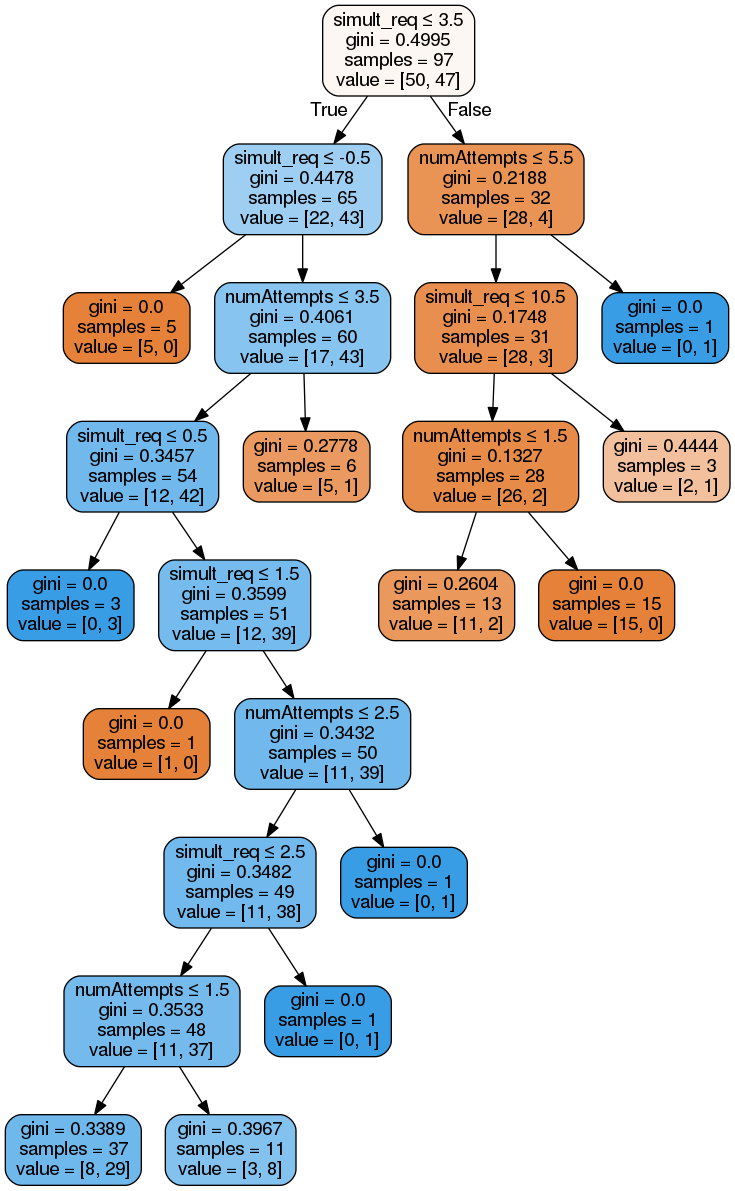

In [100]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                         feature_names=features,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 